# WS 01

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

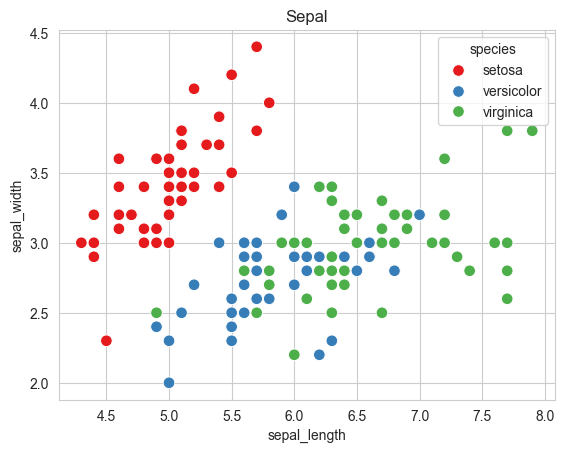

In [7]:
sns.set_style('whitegrid')
sns.scatterplot(x='sepal_length',y='sepal_width',data=df, hue='species',palette='Set1', s=70) # v0.12.2
plt.title('Sepal')
plt.show()

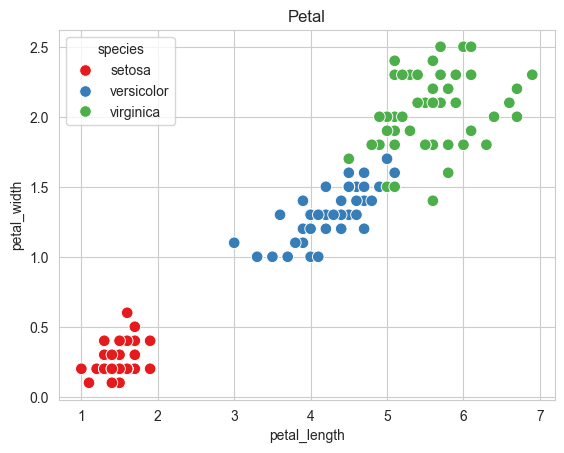

In [8]:
sns.scatterplot(x='petal_length',y='petal_width',data=df, hue='species',palette='Set1', s=70)
plt.title('Petal')
plt.show()

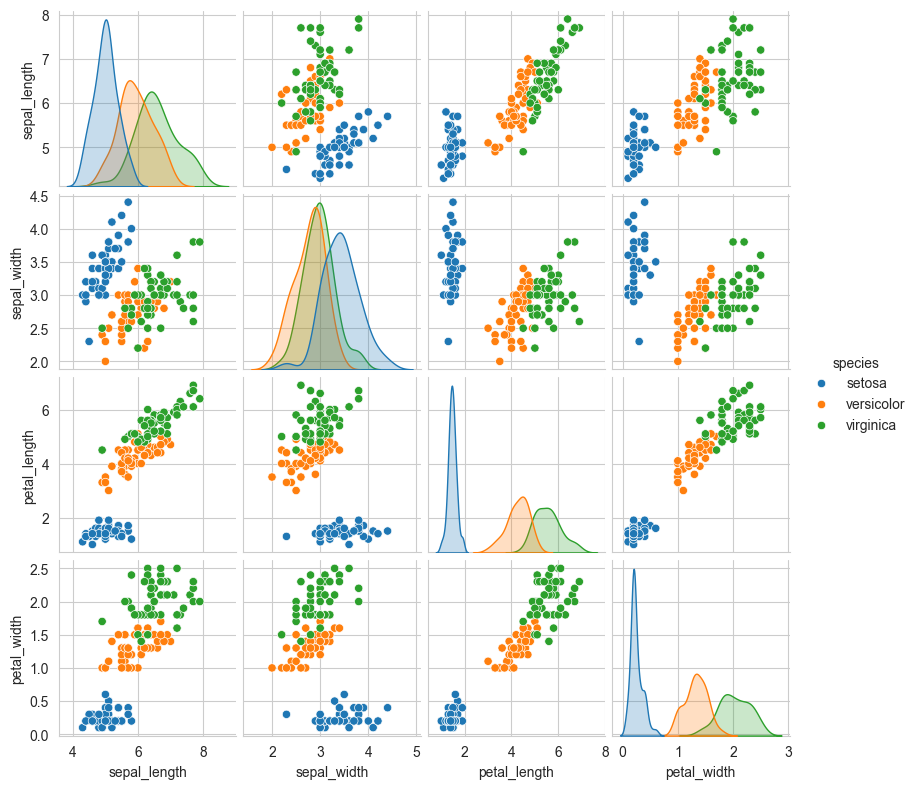

In [9]:
sns.pairplot(df, hue='species', height=2.0)
plt.show()

# WS 02

In [10]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[feature_cols]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y = df.species
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [13]:
X.shape

(150, 4)

In [14]:
y.shape

(150,)

# ws 03 04

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3) 

In [16]:
import numpy as np
(label, count) = np.unique(y_test , return_counts=True)
freq = np.asarray((label, count)).T
print(freq)

[['setosa' 19]
 ['versicolor' 12]
 ['virginica' 14]]


In [17]:
from sklearn.svm import SVC

model = SVC(kernel='linear') 

In [18]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
y_pred = model.predict(X_test)

print('Score: {:.4f}' . format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Score: 0.9556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.83      0.91        12
   virginica       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.96        45

[[19  0  0]
 [ 0 10  2]
 [ 0  0 14]]
